# Week 5 Polygon Animation

In [11]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [12]:
def cornerPts(n):
    angles = np.linspace(0, 2*np.pi, n, endpoint=False)
    x_axis = np.cos(angles)
    y_axis = np.sin(angles)
    return x_axis, y_axis


This function takes an integer n as input. It returns two arrays, x axis and y axis, containing the x and y coordinates of n evenly spaced points. Here is how it works:
Using the np.linspace function, it first generates an array of n angles ranging from 0 to 2 radians.
The x_axis and y_axis coordinates of these angles are then calculated using the np.cos and np.sin functions, respectively.
Lastly, it returns the arrays x_axis and y_axis.

In [13]:
def map(n):
    x, y = cornerPts(n)
    x_axis = np.repeat(x, 2)
    y_axis = np.repeat(y, 2)
    x_axis = np.append(x_axis, x[0])
    y_axis = np.append(y_axis, y[0])
    return x_axis, y_axis

This function also takes an integer n as input and returns two arrays, x axis and y axis, which specify the vertices of a regular n-sided polygon. Here is how it works:

To start, it uses the cornerPts(n) function to obtain the x and y coordinates of the n vertices of a regular n-sided polygon.
The np.repeat method is then used to generate a closed polygon by repeating each coordinate twice.
Lastly, it uses the np.append method to append the first coordinate to the end of the array, completing the polygon.
The vertices of the regular polygon are defined by the resultant x_axis and y_axis arrays, which may be visualised using a tool such as Matplotlib.

In [14]:
def crssMap(n):
    x,y=cornerPts(n)
    x_axis=[]
    y_axis=[]
    x_axis.append(x[0])
    y_axis.append(y[0])
    i=1
    while(i<n-1):
        x_axis.append(x[i])
        x_axis.append(x[i])
        y_axis.append(y[i])
        y_axis.append(y[i])
        i=i+1

    x_axis.append(x[n-1])
    x_axis.append(x[0])

    y_axis.append(y[n-1])
    y_axis.append(y[0])

    x_axis=np.array(x_axis)
    y_axis=np.array(y_axis)
    
    return x_axis,y_axis


This function takes an integer n as an input and provides two arrays, x_axis and y_axis. The function works like this:

To start, it uses the cornerPts(n) function to obtain the x and y coordinates of n.

It creates two empty lists, x axis and y axis, to store the x and y coordinates of a "cross" polygon's vertices.

The first coordinate of the cornerPts(n) result is added to the x axis and y axis lists.

The cross shape is then formed by looping through the n-1 remaining points.

It adds the i-th x and y coordinate to the x axis and y axis lists twice for each point I in the loop, thus creating two horizontal and two vertical lines that cross at the centre of the polygon.

After the loop, it adds the x and y coordinates of the final point to the x_axis and y_axis lists, then adds the x and y coordinates of the initial point to finish the polygon.

Finally, the x_axis and y_axis lists are converted to NumPy arrays and returned as output.

The vertices of the cross polygon are defined by the resultant x_axis and y_axis arrays, which may be visualised using a library such as Matplotlib.


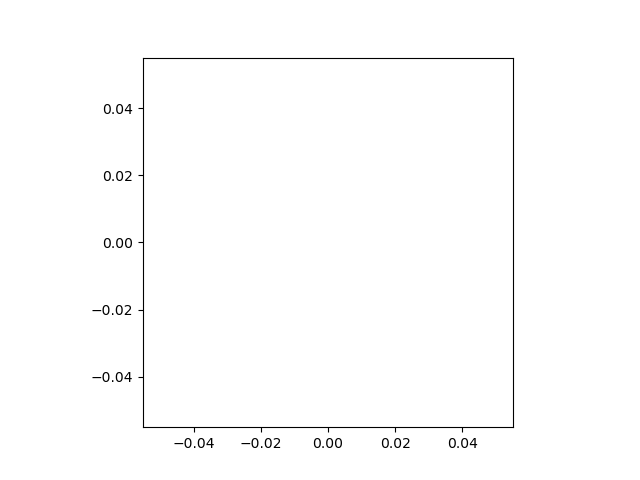

In [15]:

fig, ax = plt.subplots()
xval, yval = [], []
ln, = ax.plot([], [], 'r')
ax.set_aspect('equal',adjustable='box')


def init():
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    return ln,

def updatedVericals(frame):
    xval, yval = morphedShape(frame)
    ln.set_data(xval, yval)
    return ln,

def morphedShape(frame):
    if frame < figNo:
        n = int(frame)
        x1, y1 = map(n+2)
        x2, y2 = crssMap(n+3)
    else:
        n = int(frame)
        x1, y1 = crssMap(2*figNo-n + 2)
        x2, y2 = map(2*figNo-n + 1)
    a = frame - n
    xi = x1 + (x2 - x1) * a
    yi = y1 + (y2 - y1) * a
    return xi, yi

figNo=6

ani = FuncAnimation(fig, updatedVericals, frames=np.linspace(1, 2*figNo-1, (2*figNo-2)*50),
                    init_func=init, blit=True, interval=10, repeat=False)
plt.show()

To creates an animation of a morphing shape that slowly morphs from a normal polygon to a cross polygon and back. The following is what the code does:

It creates a new plot line ln and specifies a few variables to record the x and y values of the shape's vertices.

It defines the function init(), which sets the x and y bounds of the plot and returns the first plot line.

It specifies the function updatedVerticals(frame), which updates the ln plot line with the shape's vertices' new x and y values depending on the current animation frame number frame.

Now defines the function morphedShape(frame), which calculates the shape's vertices' intermediate x and y values depending on the current animation frame number frame. Based on the current value of the frame, the function generates the initial and final forms using either the map(n) or crssMap(n) functions. The intermediate form is then calculated by mixing the two shapes with a parameter a ranging from 0 to 1.

It sets the value of figNo to determine the number of sides of the regular polygon and generates an animation with Matplotlib's FuncAnimation function. For each frame of the animation, the updatedFrame function is run, and the resulting plot is presented with plt.show ().

The value of figNo is set to 6 in this code because it specifies the regular polygon's side count, which is needed to create the animation's beginning and finishing shapes.
The animation in this case has a total of 10 frames since (2*figNo-2)*50  frames and the regular polygon in this case has 8 sides because n+2 = 8 when n=6.

The resulting animation demonstrates the form changing perfectly from a normal polygon to a cross polygon and back again. Animation of polygons shown.